# Assessing results

## Losses

- Regression losses
- Classification losses

## Performance measures

(Heavily inspired by Chapter 3 of [Hands-On Machine Learning](https://github.com/ageron/handson-ml2) by Aurélien Géron)

- Metrics for regression
- Metrics for classification

## Environment setup

In [2]:
import platform

print(f"Python version: {platform.python_version()}")
assert platform.python_version_tuple() >= ("3", "6")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Python version: 3.7.5


In [2]:
import sklearn

print(f"scikit-learn version: {sklearn.__version__}")
assert sklearn.__version__ >= "0.22"  # For plotting API

from sklearn.metrics import log_loss

scikit-learn version: 0.22.1


## Regression losses

### Mean Absolute Error

Aka *l1 or Manhattan norm*.

$$\mathrm{MAE}(\boldsymbol{\pmb{\theta}}) = \frac{1}{m}\sum_{i=1}^m |\mathcal{h}_\theta(\mathbf{x}^{(i)}) - y^{(i)}| = \frac{1}{m}{\lVert{h_\theta(\pmb{X}) - \pmb{y}}\rVert}_1$$

### Mean Squared Error

Most sensible to outliers.

$$\mathrm{MSE}(\boldsymbol{\pmb{\theta}}) = \frac{1}{m}\sum_{i=1}^m (\mathcal{h}_\theta(\mathbf{x}^{(i)}) - y^{(i)})^2 = \frac{1}{m}{{\lVert{h_\theta(\pmb{X}) - \pmb{y}}\rVert}_2}^2$$

### Root Mean Squared Error

Aka *l2 or Euclidean norm*). The default choice.

$$\mathrm{RMSE}(\boldsymbol{\pmb{\theta}}) = \sqrt{\frac{1}{m}\sum_{i=1}^m (\mathcal{h}_\theta(\mathbf{x}^{(i)}) - y^{(i)})^2} = \frac{1}{m}{\lVert{h_\theta(\pmb{X}) - \pmb{y}}\rVert}_2$$

## Classification losses

### Binary Crossentropy

Aka *logistic loss* or *negative log likelyhood*. 

- $y^{(i)}$: expected result (either 0 or 1) for the $i$th data sample.
- $y'^{(i)}$: model output (probability) for the $i$th data sample.

$$\mathcal{L}(\boldsymbol{\pmb{\theta}}) = -\frac{1}{m}\sum_{i=1}^m \left(y^{(i)} \log_e(y'^{(i)}) + (1-y^{(i)}) \log_e(1-y'^{(i)})\right)$$

In [5]:
# Define expected results
y_true = [0, 0, 1, 1]

# [.9, .1] means 90% probability that the first sample has label 0: prediction is 0.1
y_pred = [[0.9, 0.1], [0.8, 0.2], [0.3, 0.7], [0.01, 0.99]]
# -(ln(0.9) + ln(0.8) + ln(0.7) + ln(0.99))/4
print(log_loss(y_true, y_pred))

# Perfect prediction
y_pred = [[1, 0], [1, 0], [0, 1], [0, 1]]
print(log_loss(y_true, y_pred))

# Awful prediction
y_pred = [[0.1, 0.9], [0.15, 0.85], [0.83, 0.17], [0.95, 0.05]]
print(log_loss(y_true, y_pred))

0.1738073366910675
9.992007221626415e-16
2.241848548341448


### Categorical Crossentropy

$$\mathcal{L}(\boldsymbol{\pmb{\theta}}) = -\frac{1}{m}\sum_{i=1}^m\sum_{k=1}^K y^{(i)}_k \log_e(y'^{(i)}_k)$$

Equivalent to _Binary Crossentropy_ when $K = 2$.

In [2]:
# Setup plots
%matplotlib inline
plt.rcParams["figure.figsize"] = 10, 8
%config InlineBackend.figure_format = "retina"
sns.set()

In [3]:
import sklearn

print(f"scikit-learn version: {sklearn.__version__}")
assert sklearn.__version__ >= "0.22"  # For plotting API

from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    plot_confusion_matrix,
    classification_report,
    plot_roc_curve,
)
from sklearn.model_selection import cross_val_score

scikit-learn version: 0.22.1


In [4]:
import tensorflow as tf

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {tf.keras.__version__}")

from tensorflow.keras.datasets import mnist

TensorFlow version: 2.3.1
Keras version: 2.4.0


## Metrics for regression

### RMSE (again)

A typical performance metric for regression tasks is Root Mean Square Error.

$$ \mathrm{RMSE}(\mathbf{X}, h_\theta) = \sqrt{\frac{1}{m}\sum_{i=1}^m (\mathcal{h}_\theta(\mathbf{x}^{(i)}) - y^{(i)})^2} $$

MAE (less sensitive to outliers) and MSE can also be used.


## Metrics for classification

### Thresholding model output

During inference, the model output (probabilities) are thresholded into discrete values.

Thresholds are problem-dependent.

### Accuracy

A simple evaluation metric for classification is **accuracy**.

$$Accuracy = \frac{\text{Number of exact predictions}}{\text{Total number of predictions}} $$

In [5]:
# Define ground truth and prediction vectors
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 1, 2, 2, 0, 1]

# Using scikit-learn to compute accuracy
acc = accuracy_score(y_true, y_pred)

# 4 good predictions, 6 total => accuracy = 2/3
print(f"Accuracy: {acc:.5f}")

Accuracy: 0.66667


### Example: training a binary classifier using SGD

In [6]:
# Load the MNIST digits dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(f"Training images: {train_images.shape}. Training labels: {train_labels.shape}")
print(f"Test images: {test_images.shape}. Test labels: {test_labels.shape}")

Training images: (60000, 28, 28). Training labels: (60000,)
Test images: (10000, 28, 28). Test labels: (10000,)


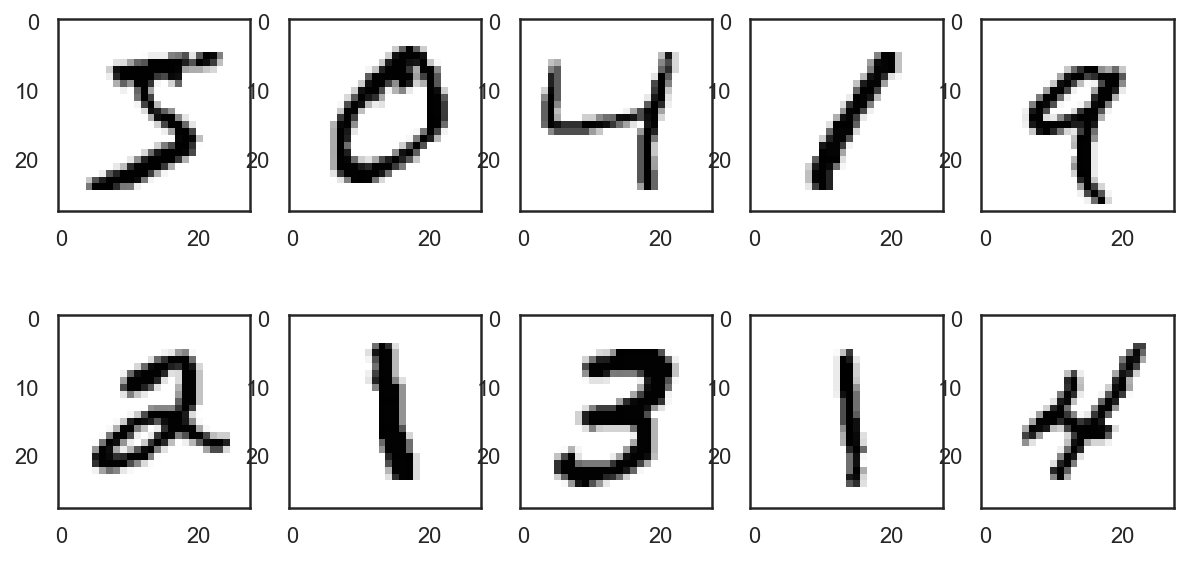

In [7]:
# Plot the first 10 digits
with sns.axes_style("white"):  # Temporary hide Seaborn grid lines
    plt.figure(figsize=(10, 5))
    for i in range(10):
        digit = train_images[i]
        fig = plt.subplot(2, 5, i + 1)
        plt.imshow(digit, cmap=plt.cm.binary)

In [8]:
# Reshape images into a (samples, 28x28) matrix
x_train = train_images.reshape((60000, 28 * 28))
x_test = test_images.reshape((10000, 28 * 28))

# 784=28x28
print(f"x_train: {x_train.shape}")
print(f"x_test: {x_test.shape}")

x_train: (60000, 784)
x_test: (10000, 784)


In [9]:
# Rescale pixel values from [0:255] to [0:1]

x_train = x_train / 255.0
# Alternative: x_train = x_train.astype("float32") / 255
x_test = x_test / 255.0
# Alternative: x_test = x_test.astype("float32") / 255

In [10]:
# Show 10 random labels (integer scalars between 0 and 9)
df_train_labels = pd.DataFrame(train_labels)
df_train_labels.columns = {"digit"}
df_train_labels.head()

,digit
0,5
1,0
2,4
3,1
4,9


In [11]:
# Create binary vectors of expected results
# label is true for all 5s, false for all other digits
y_train_5 = train_labels == 5
y_test_5 = test_labels == 5

# true, false, false
print(y_train_5[0], y_train_5[1], y_train_5[2])

True False False


In [12]:
# Create a classifier using stochastic gradient descent and log loss
sgd_model = SGDClassifier(loss="log")

# Trains the model on data
sgd_model.fit(x_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [13]:
# Test on first 3 digits
samples = [x_train[0], x_train[1], x_train[2]]

# Print binary predictions (5/not 5)
print(sgd_model.predict(samples))

# Print prediction probabilities
sgd_model.predict_proba(samples).round(decimals=3)

[ True False False]


array([[0.165, 0.835],
       [1.   , 0.   ],
       [1.   , 0.   ]])

In [14]:
# The score() method computes accuracy for SGDClassifier
print(f"Training accuracy: {sgd_model.score(x_train, y_train_5):.05f}")

# Computing accuracy by hand
train_acc = np.sum([sgd_model.predict(x_train) == y_train_5]) / len(x_train)
print(f"Manual computation: {train_acc:.05f}")

# Using cross-validation to evaluate accuracy, using 3 folds
cv_acc = cross_val_score(sgd_model, x_train, y_train_5, cv=3, scoring="accuracy")
print(f"CV accuracy: {cv_acc}")

Training accuracy: 0.97537
Manual computation: 0.97537
CV accuracy: [0.9709 0.972  0.9723]


### Accuracy shortcomings

When the dataset is *skewed* (some classes are more frequent than others), computing accuracy is not enough to assert the model's performance.

To find out why, let's imagine a dumb binary classifier that always predicts that the digit is not 5.

In [15]:
not5_count = (y_train_5 == False).sum()
print(f"There are {not5_count} digits other than 5 in the training set")

dumb_model_acc = not5_count / len(x_train)
print(f"Dumb classifier accuracy: {dumb_model_acc:.05f}")

There are 54579 digits other than 5 in the training set
Dumb classifier accuracy: 0.90965


### True/False positives and negatives

- **True Positive (TP)**: the model _correctly_ predicts the positive class.
- **False Positive (FP)**: the model _incorrectly_ predicts the positive class.
- **True Negative (TN)**: the model _correctly_ predicts the negative class.
- **False Negative (FN)**: the model _incorrectly_ predicts the negative class.

$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

### Confusion matrix

Useful representation of classification results. Row are actual classes, columns are predicted classes.

[![Confusion matrix for 5s](images/confusion_matrix.png)](https://github.com/ageron/handson-ml2)

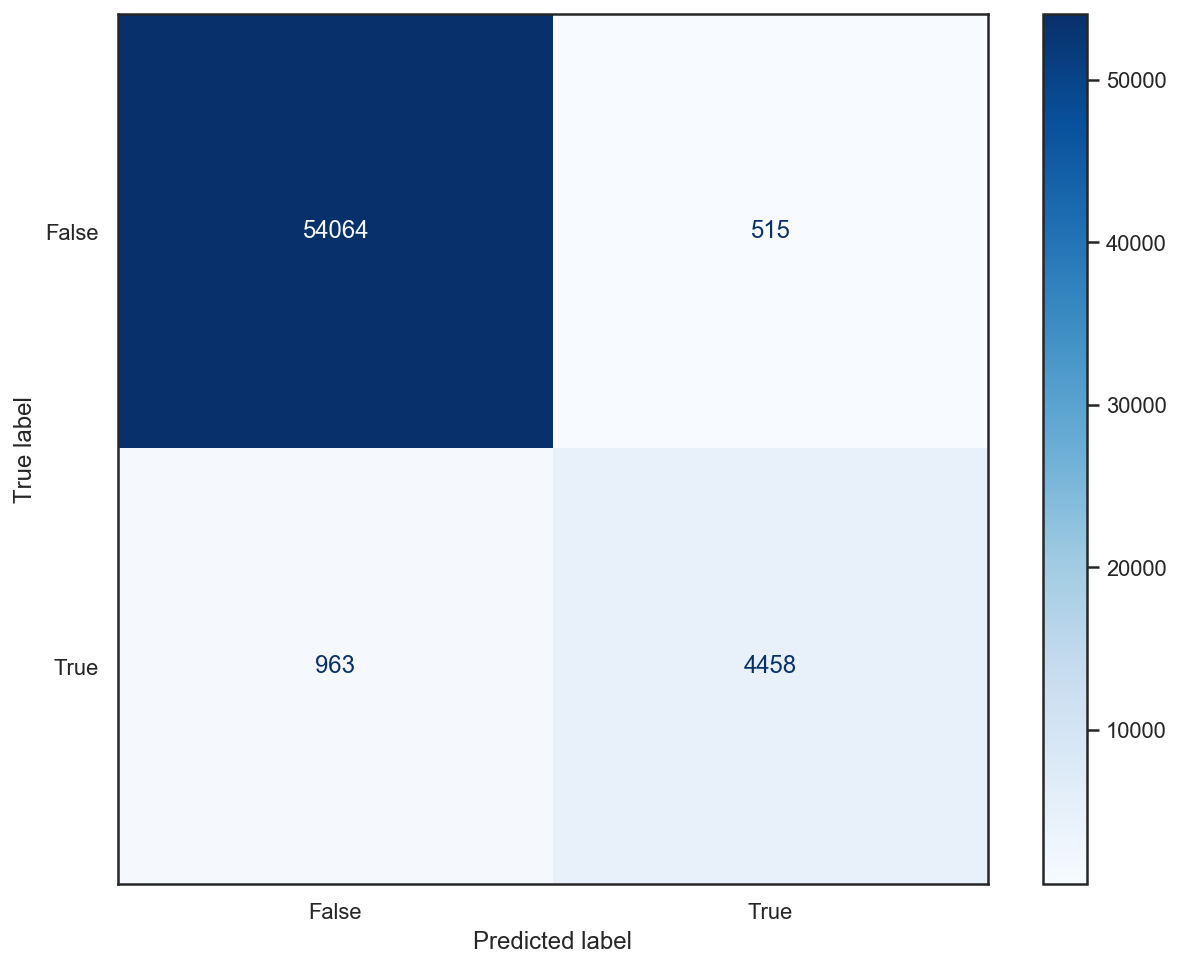

In [16]:
# Plot the confusion matrix for a model and a dataset
def plot_conf_mat(model, x, y):
    with sns.axes_style("white"):  # Temporary hide Seaborn grid lines
        display = plot_confusion_matrix(
            model, x, y, values_format="d", cmap=plt.cm.Blues
        )


# Plot confusion matrix for the SGD classifier
plot_conf_mat(sgd_model, x_train, y_train_5)

### Precision and recall

- **Precision**: proportion of positive identifications that were actually correct.
- **Recall** (or *sensitivity*): proportion of actual positives that were identified correctly.

$$Precision = \frac{TP}{TP + FP} = \frac{\text{True Positives}}{\text{Total Predicted Positives}}$$

$$Recall = \frac{TP}{TP + FN} = \frac{\text{True Positives}}{\text{Total Actual Positives}}$$

### Example: a (flawed) tumor classifier

Context: binary classification of tumors (positive means malignant). Dataset of 100 tumors, of which 9 are malignant.

| Negatives | Positives |
|-|-|
| True Negatives: 90 | False Positives: 1 |
| False Negatives: 8 | True Positives: 1|

$$Accuracy = \frac{90+1}{100} = 91\%$$
$$Precision = \frac{1}{1 + 1} = 50\%\;\;\;
Recall = \frac{1}{1 + 8} = 11\%$$

### F1 score

- Weighted average (*harmonic mean*) of precision and recall.
- Also known as _balanced F-score_ or _F-measure_.

$$F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}$$

Good metric in case of class imbalance, when precision and recall are both important.

In [17]:
# Using scikit-learn to compute several metrics about the SGD classifier
print(classification_report(y_train_5, sgd_model.predict(x_train)))

              precision    recall  f1-score   support

       False       0.98      0.99      0.99     54579
        True       0.90      0.82      0.86      5421

    accuracy                           0.98     60000
   macro avg       0.94      0.91      0.92     60000
weighted avg       0.97      0.98      0.97     60000



### The precision/recall trade-off

- Improving precision typically reduces recall and vice versa ([example](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall#precision-and-recall:-a-tug-of-war)).
- Precision matters most when the cost of false positives is high (example: spam detection).
- Recall matters most when the cost of false negatives is high (example: tumor detection).

### ROC curve and AUROC

$$\text{TP Rate} = \frac{TP}{TP + FN} = Recall\;\;\;\;
\text{FP Rate} = \frac{FP}{FP + TN}$$

- ROC stands for "Receiver Operating Characteristic".
- A ROC curve plots TPR vs. FPR at different classification thresholds.
- AUC or more precisely AUROC ("Area Under the ROC Curve") provides an aggregate measure of performance across all possible classification thresholds.

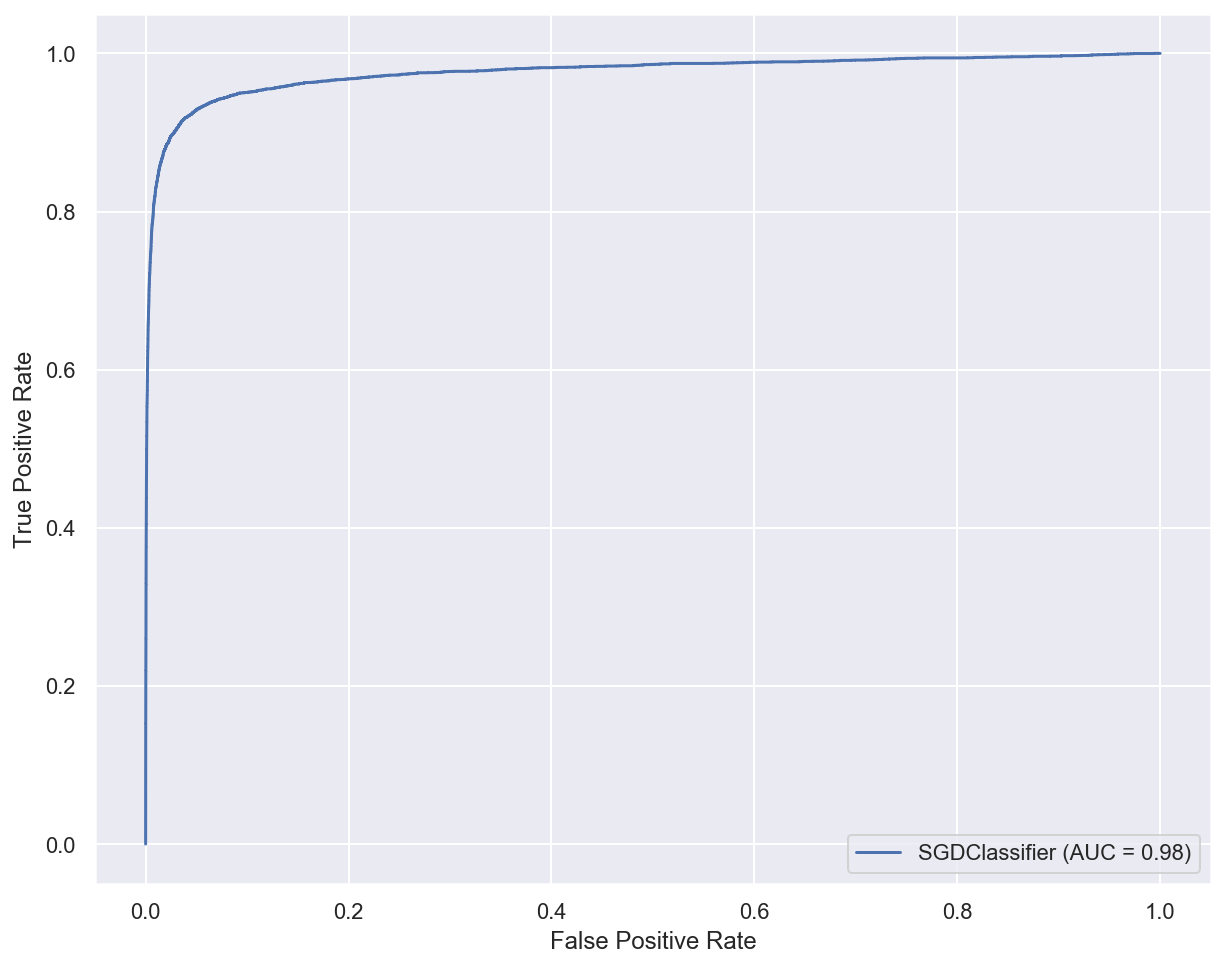

In [18]:
# Plot ROC curve for the SGD classifier
sgd_disp = plot_roc_curve(sgd_model, x_train, y_train_5)
plt.show()

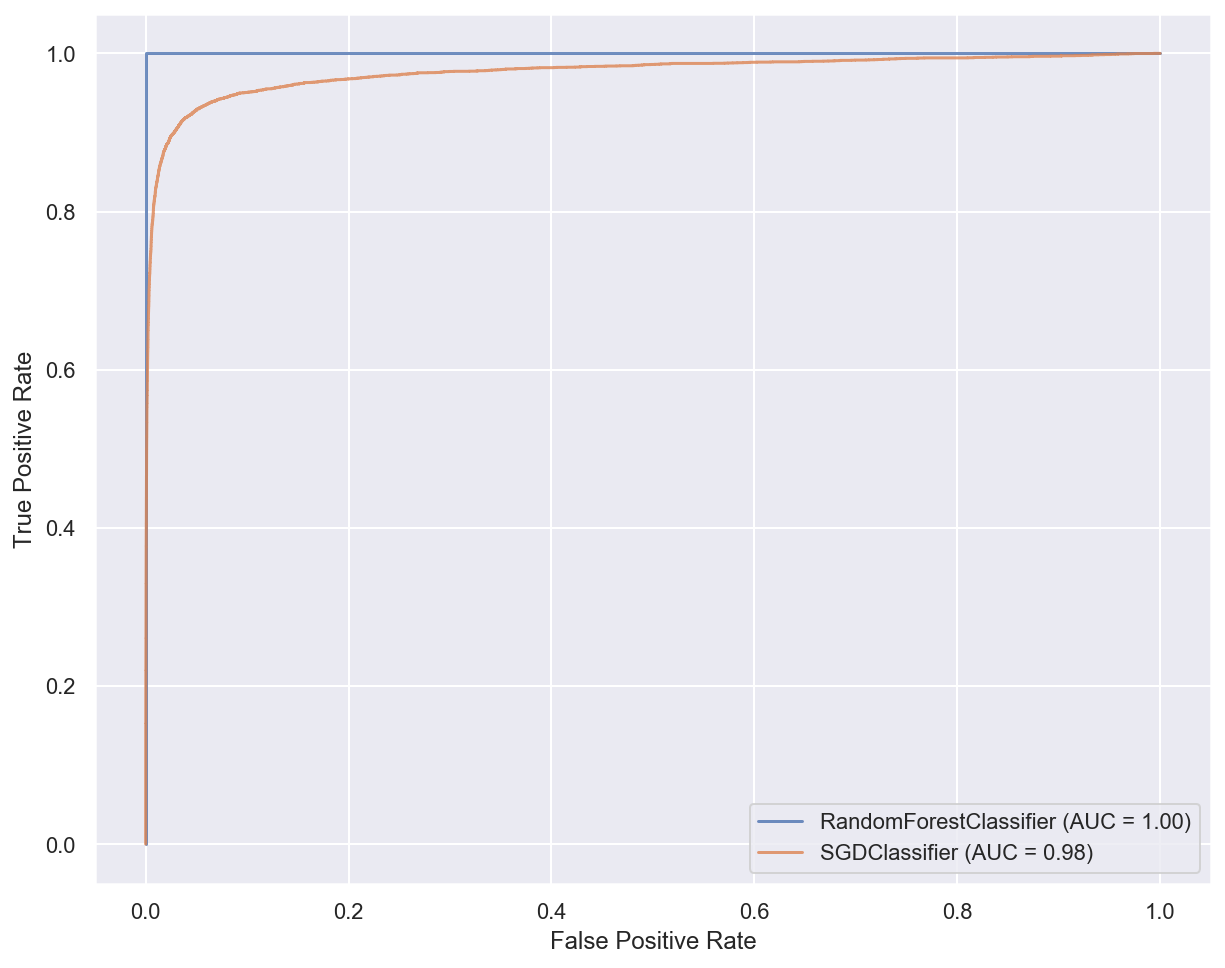

In [19]:
# Training a Random Forest classifier on same dataset
rf_model = RandomForestClassifier(n_estimators=50)
rf_model.fit(x_train, y_train_5)

# Plot ROC curves for both classifiers
ax = plt.gca()
rf_disp = plot_roc_curve(rf_model, x_train, y_train_5, ax=ax, alpha=0.8)
sgd_disp.plot(ax=ax, alpha=0.8)
plt.show()

### Multiclass classification

In [20]:
# Using all digits in the datasets
y_train = train_labels
y_test = test_labels

# Training a SGD classifier to recognize all digits, not just 5s
multi_sgd_model = SGDClassifier(loss="log")
multi_sgd_model.fit(x_train, y_train)

# Since dataset is not class imbalanced anymore, accuracy is a reliable metric
print(f"Training accuracy: {multi_sgd_model.score(x_train, y_train):.05f}")
print(f"Test accuracy: {multi_sgd_model.score(x_test, y_test):.05f}")

Training accuracy: 0.92013
Test accuracy: 0.91640


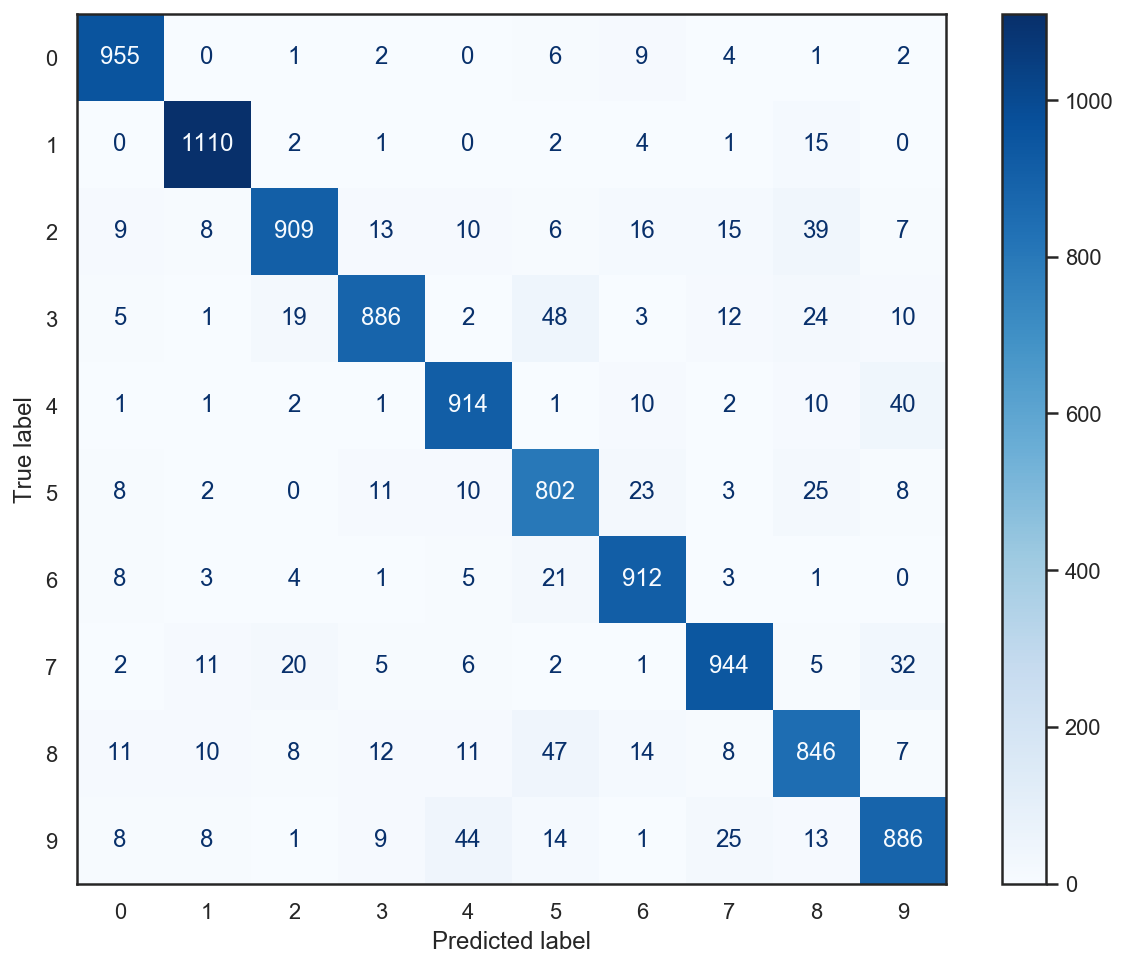

In [21]:
# Plot confusion matrix for multiclass SGD classifier on test data
plot_conf_mat(multi_sgd_model, x_test, y_test)